<a href="https://colab.research.google.com/github/ndtuan10/Neural-network-and-Genetic-algorithms_CS410.M11.KHCL/blob/main/Logistic%20Regression/Logistic_Regression_Folio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Ngô Đức Tuấn**

MSSV: 18520186

##**Bài tập 4: Logistic Regression**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import các thư viện cần dùng
import os
import cv2
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

print('''
  Phiên bản của các thư viện :
    + Tensorflow : {0}
    + keras : {1}
    + numpy : {2}
    + pandas : {3}
'''.format(tf.__version__, keras.__version__, np.__version__, pd.__version__))


  Phiên bản của các thư viện :
    + Tensorflow : 2.7.0
    + keras : 2.7.0
    + numpy : 1.19.5
    + pandas : 1.1.5



# **Xử lí dataset**

Folio Leaf dataset bao gồm tất cả 199 ảnh thuộc 10 loại of 10 loại lá khác nhau. Chiều rộng và chiều cao của mỗi ảnh lần lượt là 2322 và 4128. Sau đây là một số ví dụ của từng loại lá:

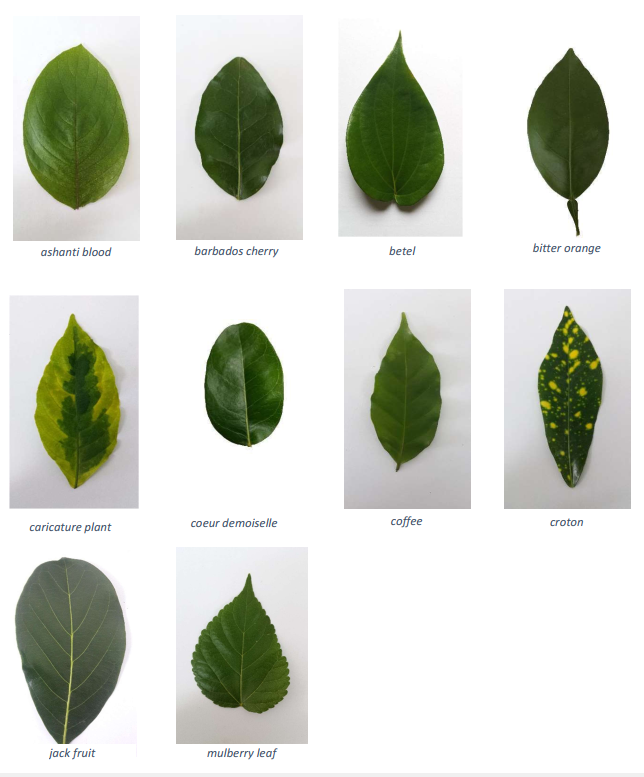

In [3]:
Path_dir = '/content/drive/My Drive/Mạng neural và thuật giải di truyền/dataset/'

In [4]:
classNames = [i for i in os.listdir(Path_dir)]
print(classNames)

['mulberry leaf', 'betel', 'caricature plant', 'bitter orange', 'croton', 'coeur demoiselle', 'coffee', 'ashanti blood', 'jackfruit', 'barbados cherry']


In [5]:
def loadData(path):
  X, y = [], []
  for folder_name in classNames:
    folder_path = os.path.join(Path_dir, path, folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        print(fpath)
        img = cv2.imread(fpath,0)
        img_data = cv2.resize(img, (int(img.shape[1]*0.1), int(img.shape[0]*0.1)))
        X.append(img_data)
        y.append(folder_name)

  # Preprocessing
  X = np.asarray(X)
  y = np.asarray(y)
  print('Loading completed. ')
  return X,y

In [6]:
X, y = loadData(Path_dir)

/content/drive/My Drive/Mạng neural và thuật giải di truyền/dataset/mulberry leaf/20150324_144731.jpg
/content/drive/My Drive/Mạng neural và thuật giải di truyền/dataset/mulberry leaf/20150324_144802.jpg
/content/drive/My Drive/Mạng neural và thuật giải di truyền/dataset/mulberry leaf/20150324_144742.jpg
/content/drive/My Drive/Mạng neural và thuật giải di truyền/dataset/mulberry leaf/20150324_144712.jpg
/content/drive/My Drive/Mạng neural và thuật giải di truyền/dataset/mulberry leaf/20150324_144857.jpg
/content/drive/My Drive/Mạng neural và thuật giải di truyền/dataset/mulberry leaf/20150324_144847.jpg
/content/drive/My Drive/Mạng neural và thuật giải di truyền/dataset/mulberry leaf/20150324_145002.jpg
/content/drive/My Drive/Mạng neural và thuật giải di truyền/dataset/mulberry leaf/20150324_145023.jpg
/content/drive/My Drive/Mạng neural và thuật giải di truyền/dataset/mulberry leaf/20150324_173311.jpg
/content/drive/My Drive/Mạng neural và thuật giải di truyền/dataset/mulberry leaf/

In [7]:
len(X)

199

In [8]:
len(y)

199

In ra kích thước X,y

In [9]:
print(X.shape)

(199, 412, 232)


In [10]:
print(y.shape)

(199,)


# **Train-test split**

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [12]:
# Khai phá dữ liệu 
print('X_train: {}, y_train: {}, X_test: {}, y_test: {}'.format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train: (139, 412, 232), y_train: (139,), X_test: (60, 412, 232), y_test: (60,)


In [13]:
result = {
    'Data':["X_train", "y_train", "X_test", "y_test"],
    'Shape': [X_train.shape, y_train.shape, X_test.shape, y_test.shape]
}
pd.DataFrame(result)

,Data,Shape
0,X_train,"(139, 412, 232)"
1,y_train,"(139,)"
2,X_test,"(60, 412, 232)"
3,y_test,"(60,)"


# **Phương pháp Learning on all pixels**

## **Tiền xử lý dữ liệu**

In [14]:
def convert_to_1D(image):
    return np.reshape(image, image.shape[0] * image.shape[1])

X_train_new = []

for x in X_train:
    X_train_new.append(convert_to_1D(x))

X_test_new = []

for x in X_test:
    X_test_new.append(convert_to_1D(x))

## **Huấn luyện mô hình Logistic Regression**

In [15]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=10000, random_state=1, n_jobs=2)

In [16]:
import time
start = time.time()
clf.fit(X_train_new, y_train)
end = time.time()
LR_time = {end-start}
print(LR_time)

{61.34669876098633}


## **Test và đánh giá mô hình**

In [17]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import precision_recall_curve

In [18]:
# Hàm vẽ confusion matrix
def CM_plot(M):
    X = [i/sum(i) for i in M]
    fig, ax = plt.subplots(figsize=(8,6))
    sns.heatmap(X, cmap='Blues', square = True, annot=True, ax=ax)
# Hàm vẽ tương quan predict và recall theo thresholds
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds, axlim):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)
    plt.grid(True)
    plt.axis([-axlim, axlim, -0.05, 1.05])

In [19]:
# Testing
y_pred = clf.predict(X_test_new)

In [20]:
# Evaluating
accuracy_score_LR = accuracy_score(y_test, y_pred)

print(f'Aaccuracy score: {np.multiply(round(accuracy_score(y_test, y_pred), 4),100)} %')

Aaccuracy score: 86.67 %


In [21]:
print('Classification Report')
print(classification_report(y_test, y_pred))

Classification Report
                  precision    recall  f1-score   support

   ashanti blood       1.00      0.75      0.86         4
 barbados cherry       1.00      0.80      0.89         5
           betel       1.00      0.89      0.94         9
   bitter orange       0.57      1.00      0.73         4
caricature plant       1.00      1.00      1.00         8
coeur demoiselle       0.67      0.57      0.62         7
          coffee       0.80      0.80      0.80         5
          croton       1.00      1.00      1.00         5
       jackfruit       0.88      0.88      0.88         8
   mulberry leaf       0.83      1.00      0.91         5

        accuracy                           0.87        60
       macro avg       0.87      0.87      0.86        60
    weighted avg       0.89      0.87      0.87        60



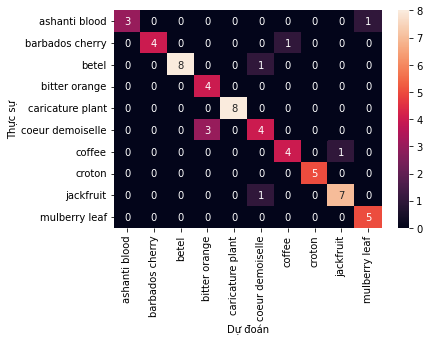

In [22]:
#Xem ma trận nhầm lẫn
cm_matrix = pd.crosstab(y_test, y_pred, rownames=["Thực sự"], colnames=["Dự đoán"])
sns.heatmap(cm_matrix, annot=True, fmt="d")

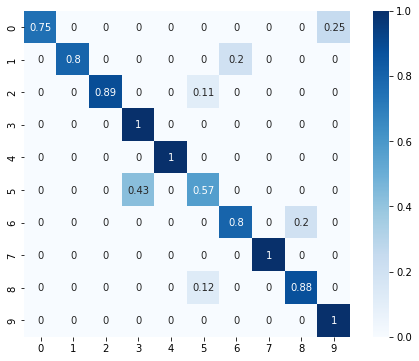

In [23]:
#Chuẩn hóa ma trận
from sklearn.metrics import confusion_matrix
CM_plot(confusion_matrix(y_test, y_pred))

# **Phương pháp HOG**

## **Tiền xử lý dữ liệu**

In [24]:
from skimage.feature import hog

In [25]:
def calculate_hog(image):
    return hog(image, orientations=9, pixels_per_cell=(16, 16),
    cells_per_block=(2, 2), block_norm='L2')

X_train_new_hog = []

for x in X_train:
    X_train_new_hog.append(calculate_hog(x))

X_test_new_hog = []

for x in X_test:
    X_test_new_hog.append(calculate_hog(x))

## **Huấn luyện mô hình Logistic Regression**

In [26]:
clf_=LogisticRegression(max_iter=10000, random_state=1, n_jobs=2)

In [27]:
start = time.time()
clf_.fit(X_train_new_hog, y_train)
end = time.time()
LR_time_hog = {end-start}
print(LR_time_hog)

{9.929073333740234}


## **Test và đánh giá mô hình**

In [28]:
# Testing
y_pred_=clf_.predict(X_test_new_hog)

In [29]:
# Evaluating
accuracy_score_LR_hog = accuracy_score(y_test, y_pred_)

print(f'Aaccuracy score: {np.multiply(round(accuracy_score(y_test, y_pred_), 4),100)} %')

Aaccuracy score: 85.0 %


In [30]:
print('Classification Report')
print(classification_report(y_test, y_pred_))

Classification Report
                  precision    recall  f1-score   support

   ashanti blood       1.00      1.00      1.00         4
 barbados cherry       1.00      0.80      0.89         5
           betel       1.00      0.89      0.94         9
   bitter orange       0.67      1.00      0.80         4
caricature plant       0.86      0.75      0.80         8
coeur demoiselle       1.00      0.71      0.83         7
          coffee       0.43      0.60      0.50         5
          croton       1.00      1.00      1.00         5
       jackfruit       0.88      0.88      0.88         8
   mulberry leaf       0.83      1.00      0.91         5

        accuracy                           0.85        60
       macro avg       0.87      0.86      0.85        60
    weighted avg       0.88      0.85      0.86        60



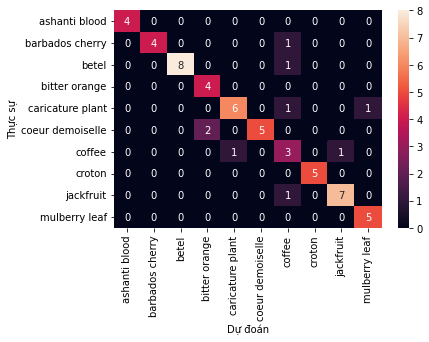

In [31]:
#Xem ma trận nhầm lẫn
cm_matrix = pd.crosstab(y_test, y_pred_, rownames=["Thực sự"], colnames=["Dự đoán"])
sns.heatmap(cm_matrix, annot=True, fmt="d")

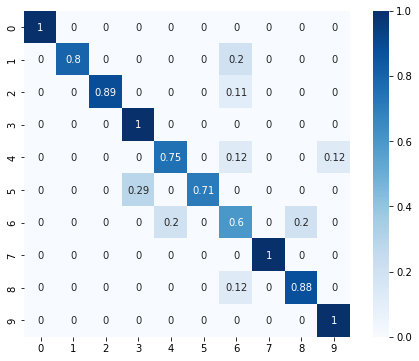

In [32]:
#Chuẩn hóa ma trận
CM_plot(confusion_matrix(y_test, y_pred_))

# **So sánh kết quả**

In [36]:
results_dict={'Phuong phap phan lop':['LR (Learning on all pixs)', 'LR (HOG)'],
              'Accuracy':['86.67%', '85%'],
              'Time':['61.34s', '9.93s'],}
pd.DataFrame(results_dict)

,Phuong phap phan lop,Accuracy,Time
0,LR (Learning on all pixs),86.67%,61.34s
1,LR (HOG),85%,9.93s


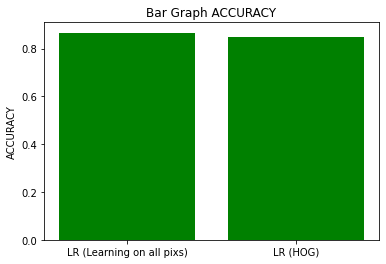

In [34]:
#in biểu đồ
BarGraph=['LR (Learning on all pixs)', 'LR (HOG)']
accuracy=[accuracy_score_LR,accuracy_score_LR_hog]
plt.bar(BarGraph,accuracy,color='green')
plt.title('Bar Graph ACCURACY')
plt.xlabel('')
plt.ylabel('ACCURACY')
plt.show()

In [35]:
print('Thời gian huấn luyện các mô hình:')
print('LR (Learning on all pixs) : \n','time:', LR_time)
print('======================================================')
print('LR (HOG) : \n','time:', LR_time_hog)
print('======================================================')

print('****======================================================****')

print('Độ chính xác các mô hình:')
print('LR (Learning on all pixs) : \n','accuracy:', accuracy_score_LR)
print('======================================================')
print('LR (HOG) : \n','accuracy:', accuracy_score_LR_hog)
print('======================================================')

Thời gian huấn luyện các mô hình:
LR (Learning on all pixs) : 
 time: {61.34669876098633}
LR (HOG) : 
 time: {9.929073333740234}
****======================================================****
Độ chính xác các mô hình:
LR (Learning on all pixs) : 
 accuracy: 0.8666666666666667
LR (HOG) : 
 accuracy: 0.85
